#### Changelog

1. Q13.3 How many clams that are wider than 0.4, have first name "Monster"?   
2. Q13.4 What was the second name of a clam captured at March, 8, that was longer than 0.65 and wider than 0.57?
3. Q15.2 Create a new column `area` using diameter, length and considering that a clam is a perfect rectangle.
4. Q19.4 `density_by_age` groupby `age_cat` and compute average density of a clam.

# Assignment 1. Sea Ears.
by Anvar Kurmukov,
updated by Bogdan Kirillov

---

By the end of this task you will be able to manipulate huge tabular data:
1. Compute different column's statistics (min, max, mean, quantiles etc.);
2. Select observations/features by condition/index;
3. Create new non-linear combinations of the columns (feature engineering);
4. Perform automated data cleaning;

and more.

---

For those who are not familiar with `pandas` we recommend these (alternative) tutorials:

1. Single notebook, covers basic pandas functionality (starting with renaming columns ending with using map, apply etc) ~ 30 short examples with links on videos https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb . Highly recommended for everyone. (about 1-3 hours to go through)

2. https://github.com/guipsamora/pandas_exercises/ 11 topics covering all essential functionality with excersises (with solutions).

This task will be an easy ride after these tutorials.

---

We are using the data on a species of clam called abalone, also known as "Sea ears". This dataset is in public domain and can be obtained from Delve: http://www.cs.toronto.edu/~delve/data/abalone/desc.html For this task, we have modified the dataset slightly, so you could try out some complicated data manipulation techniques while keeping the dataset as simple as possible. So, in our case, each abalone clam is a promising rapper who is ready for a debut mixtape.

You need to place "sea_ears.csv" file in the same directory as this notebook.


In [1]:
import numpy as np
import pandas as pd

# 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `sea_ears.csv` file using `pd.read_csv()` function.
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table. `.head()`
- Print last 10 observations in the table. `.tail()`
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns). This is the `.shape` of the data.

*Almost* every python has a `head` and a `tail` just as DataFrames do.

If you are using Google Colab, you can upload the file in the cell below. If you are NOT using Colab, set COLAB_P in the cell below to False.

In [2]:
COLAB_P = False
if COLAB_P:
  print("Upload your file, then read it with pd.read_csv()")
  from google.colab import files
  uploaded = files.upload()
  fn = list(uploaded.keys())[0]
  print("File is uploaded to ", fn)
else:
  print("Place your file to the same directory as the notebook, then read your file with pd.read_csv()")

Place your file to the same directory as the notebook, then read your file with pd.read_csv()


In [3]:
# Load the data

df = pd.read_csv("sea_ears.csv", index_col=0)

In [4]:
# Observe top 10 observations (int)
df.head(10)

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole,Shucke,Viscera,Shell,Rings
0,835,Kid,College,Machine,20200621T000000,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0
1,540,Jalapeno,Glam,Machine,20200308T000000,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0
2,2295,Baby,Full,Killer,20200222T000000,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0
3,858,Kid,Rock,Head,20200222T000000,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0
4,2329,Boy,Block,Death,20201219T000000,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0
5,2648,DJ,Block,Head,20201224T000000,M,0.500,0.380,0.120,0.5765,0.2730,0.1350,0.1450,9.0
6,3723,Big,Full,Death,20200110T000000,I,0.470,0.355,0.120,0.4915,0.1765,0.1125,0.1325,9.0
7,251,Dungeon,Glam,Death,20200824T000000,M,0.590,0.470,0.180,1.1235,0.4205,0.2805,0.3600,13.0
8,1148,MC,College,Machine,20200623T000000,M,0.580,0.450,0.145,1.0025,0.5470,0.1975,0.2295,8.0
9,1949,Monster,Full,Kitty,20200202T000000,M,0.640,0.530,0.165,1.1895,0.4765,0.3000,0.3500,11.0


### Let's parse my question numbers

In [5]:
# question_list = pd.read_csv("Student questions 2021 - Sheet1.csv")

In [6]:
# question_list.index = question_list.Student

In [7]:
# my_questions = []
# for idx, num in enumerate(list(question_list.loc['Prosvirin, Kirill', :])):
#     my_questions.append(': '.join(['Q' + str(idx), num]))
# my_questions = my_questions[1:]

In [8]:
# my_questions

In [9]:
# Q1.1 What is the length of an abalone with id 986?
### Q1.2 How many rings the fifth abalone with "FN" == "Fresh" has?
# Q1.3 How many rings the sample with id 67 has?
### Q1.4 What is the `Height` of a thirty fourth sample with `Rings` == 10?
# Q1.5 How heavy as a whole is the female abalone #6?

# Please note that for some questions there are several answers. If that's the 
# case, show all of them. Also for some, there is none. If so, show the shape 
# of returned series in your output.


In [10]:
# Observe last 10 observations (int)
df.head()

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole,Shucke,Viscera,Shell,Rings
0,835,Kid,College,Machine,20200621T000000,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0
1,540,Jalapeno,Glam,Machine,20200308T000000,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0
2,2295,Baby,Full,Killer,20200222T000000,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0
3,858,Kid,Rock,Head,20200222T000000,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0
4,2329,Boy,Block,Death,20201219T000000,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0


### Q1.2

In [11]:
num_of_rings = df[df['FN'] == 'Fresh'].iloc[4, :].Rings
print(f'Q1.2: Number of rings is {num_of_rings}')

Q1.2: Number of rings is 8.0


### Q1.4

In [12]:
height_34th = df[df['Rings'] == 10].iloc[33].Height
print(f'Q1.4: The height is {height_34th}')

Q1.4: The height is 0.18


In [13]:
### Q2.1 What is the diameter of a tenth abalone with second name Flow?
### Q2.2 What is the weight of a shell for 99-th abalone with first name Lil'?
# Q2.3 How many rings twelfth abalone with first name MC' has?
# Q2.4 How many rings the 666-th abalone has?
# Q2.5 What is the gender of 1337-th abalone?

In [14]:
# Increase maximal displayed columns
pd.options.display.max_columns = 30

In [15]:
# Observe top 10 observations again
# Is there any new columns displayed?
df.head(10)

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole,Shucke,Viscera,Shell,Rings
0,835,Kid,College,Machine,20200621T000000,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0
1,540,Jalapeno,Glam,Machine,20200308T000000,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0
2,2295,Baby,Full,Killer,20200222T000000,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0
3,858,Kid,Rock,Head,20200222T000000,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0
4,2329,Boy,Block,Death,20201219T000000,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0
5,2648,DJ,Block,Head,20201224T000000,M,0.500,0.380,0.120,0.5765,0.2730,0.1350,0.1450,9.0
6,3723,Big,Full,Death,20200110T000000,I,0.470,0.355,0.120,0.4915,0.1765,0.1125,0.1325,9.0
7,251,Dungeon,Glam,Death,20200824T000000,M,0.590,0.470,0.180,1.1235,0.4205,0.2805,0.3600,13.0
8,1148,MC,College,Machine,20200623T000000,M,0.580,0.450,0.145,1.0025,0.5470,0.1975,0.2295,8.0
9,1949,Monster,Full,Kitty,20200202T000000,M,0.640,0.530,0.165,1.1895,0.4765,0.3000,0.3500,11.0


In [16]:
# Print all the columns/features names (int)
print(list(df))

['id', 'FN', 'SN', 'LN', 'Captured', 'Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucke', 'Viscera', 'Shell', 'Rings']


### Q2.1

In [17]:
diameter = df[df['SN'] == 'Flow'].iloc[9].Diam
print(f'Q2.1: Diameter is {diameter}')

Q2.1: Diameter is 0.4515932810213069


### Q2.2

In [18]:
shell_weight = df[df['FN'] == 'Lil\''].iloc[98].Shell
print(f'Q2.2: Weight of the shell is {shell_weight}')

Q2.2: Weight of the shell is 0.22


In [19]:
df[df.id == 99]

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole,Shucke,Viscera,Shell,Rings
2001,99,Baby,College,Machine,20201106T000000,F,0.475,0.375,0.125,0.5785,0.2775,0.085,0.155,10.0


In [20]:
### Q3.1 How many columns end with a vowel?
# Q3.2 How many columns start with a vowel?
### Q3.3 Which columns are associated with the weight of the clam? 
### Как я понимаю, смысл этого задания был в поиске подстроки weight в исходных колонках. 
### Но, видимо, при обработке датасета вы оставили только Whole, Shucke, Viscera, Shell)))
# Q3.4 How many columns have `th` in their names?

**Примечание.** Сделаем вид, что тут нормальные колонки:

In [21]:
df.columns = ['id', 'FN', 'SN', 'LN', 'Captured', 'Sex', 'Length', 'Diam', 'Height',
       'Whole_weight', 'Shucke_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

### Q3.1

In [22]:
import re

In [23]:
end_vowel_num = 0
for col in list(df):
    result = re.search('[aeiou]$', col)
    if result is not None:
        end_vowel_num += 1

In [24]:
print(f'Q3.1: The number of columns end with a vowel is {end_vowel_num}')

Q3.1: The number of columns end with a vowel is 0


### Q3.2

In [25]:
weight_col_num = []
for col in list(df):
    result = re.search(r'weight', col)
    if result is not None:
        weight_col_num.append(col)

In [26]:
print(f'Q3.1: The columns are associated with the weight is {weight_col_num}')

Q3.1: The columns are associated with the weight is ['Whole_weight', 'Shucke_weight', 'Viscera_weight', 'Shell_weight']


In [27]:
# Print data size (int)

# Q4.1 How many observations are in the data?
# Q4.2 How many features are in the data?

### Q4.1

In [28]:
print(f'Amount of observations is {len(df)}')

Amount of observations is 5700


### Q4.2

In [29]:
print(f'Amount of features is {len(list(df))}')

Amount of features is 14


# 2. Basic data exploration

Lets do some basics:

`.count()` number of not NaN's in every column.
    
Is there any missing values in the data?     
Count number of unique values in every column .nunique().    
What does this tells you about the features, which are most likely categorical and which are most likely numerical?    
Use pandas `.describe()` to display basic statistic about the data.   
Use pandas `.value_counts()` to count number of unique values in a specific column.   
Use pandas `.min()`, `.max()`, `.mean()`, `.std()` to display specific statistics about the data.    
Use pandas `.dtypes` field to display data types in columns. 
Hint You could use `.sort_index()` or `.sort_values()` to sort the result of `.value_counts()`


In [30]:
# Display number of not NaN's in every column (int)

### Q5.1 How many NA values are in the `Whole` column?
# Q5.2 How many NA values are in the `Rings` column?
# Q5.3 How many NA values are in the `Viscera` column?
### Q5.4 How many NA values are in the `FN` column?
# Q5.5 How many explicit NA values are in the `Shell` column?

### Q5.1

In [31]:
print(f'Amount of NA in Whole column is {df.Whole_weight.isna().sum()}')

Amount of NA in Whole column is 13


### Q5.4

In [32]:
print(f'Amount of NA in FN column is {df.FN.isna().sum()}')

Amount of NA in FN column is 0


In [33]:
# Count number of unique values in every column (int)

# Q6.1 How many unique values are in the `FN` column?
# Q6.2 How many unique values are in the `SN` column?
# Q6.3 How many unique values are in the `Rings` column?
### Q6.4 How many unique values are in the `Viscera` column?
### Q6.5 How many unique values are in the `Shell` column?

### Q6.4

In [34]:
df.Viscera_weight.nunique()

1861

### Q6.5

In [35]:
df.Shell_weight.nunique()

1687

In [36]:
# Count frequency of the values in different columns (list of ints in ascending order)
# You could select a column using same syntax as for selecting 
# a key from a dictionary: `data[colname]

# Q7.1 For every unique `FN` value give its number of occurences.
### Q7.2 For every unique `SN` value give its number of occurences.
# Q7.3 For every unique `Rings` value give its number of occurences.
### Q7.4 For every unique `Sex` value give its number of occurences.
# Q7.5 For every unique `LN` value give its number of occurences.

### Q7.2

In [37]:
unique_fn = df.groupby('SN').aggregate({'SN': 'count'}).rename(columns={'SN': 'number of occurences'})
unique_fn = unique_fn.sort_values('number of occurences')

In [38]:
unique_fn_dct = unique_fn.to_dict()['number of occurences']
unique_fn_dct

{'Glam': 684,
 'Glock': 690,
 'Full': 707,
 'Breeze': 709,
 'College': 709,
 'Block': 711,
 'Rock': 713,
 'Flow': 777}

### Q7.4

In [39]:
unique_sex = df.groupby('Sex').aggregate({'Sex': 'count'}).rename(columns={'Sex': 'number of occurences'})
unique_sex = unique_sex.sort_values('number of occurences')

In [40]:
unique_sex_dct = unique_sex.to_dict()['number of occurences']
unique_sex_dct

{'F': 1775, 'I': 1849, 'M': 2076}

In [41]:
# Display basic data statistics using .describe()
df.describe()

,id,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings
count,5700.000000,5545.000000,5079.000000,4931.000000,5687.000000,4334.000000,5158.000000,4938.000000,4960.000000
mean,2849.500000,0.547853,0.424571,0.154530,0.849702,0.361736,0.198908,0.253074,9.826613
std,1645.592598,0.130588,0.108177,0.059298,0.493289,0.222923,0.118113,0.145495,3.378726
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,1424.750000,0.465000,0.355000,0.120000,0.458250,0.188125,0.106154,0.140500,8.000000
50%,2849.500000,0.561707,0.435000,0.150000,0.816500,0.338750,0.188687,0.245000,9.000000
75%,4274.250000,0.635000,0.500000,0.176963,1.177500,0.504000,0.274500,0.345000,11.000000
max,5699.000000,0.968190,0.794032,1.130000,2.875274,1.488000,0.760000,1.044635,29.000000


In [42]:
# Display some column statistics (list of floats, rounded up to 3 digits, e.g. 1.234)

### Q8.1 What are the max, min, mean and the std of the `Viscera` column?
# Q8.2 What are the max, min, mean and the std of the `Rings` column?
# Q8.3 What are the max, min, mean and the std of the `Length` column?
### Q8.4 What are the max, min, mean and the std of the `Diam` column?
# Q8.5 What are the max, min, mean and the std of the `Whole` column?


### Q8.1

In [43]:
df.Viscera_weight.describe().round(3).to_dict()

{'count': 5158.0,
 'mean': 0.199,
 'std': 0.118,
 'min': 0.0,
 '25%': 0.106,
 '50%': 0.189,
 '75%': 0.274,
 'max': 0.76}

### Q8.4

In [44]:
df.Diam.describe().round(3).to_dict()

{'count': 5079.0,
 'mean': 0.425,
 'std': 0.108,
 'min': 0.055,
 '25%': 0.355,
 '50%': 0.435,
 '75%': 0.5,
 'max': 0.794}

In [45]:
# Display data types of all columns (int)

### Q9.1 How many columns have `object` data type?
# Q9.2 How many columns have `int64` data type?
# Q9.3 How many columns have `float64` data type?

# Display data types of all columns (list of str)
### Q9.4 What are the columns with dtype == `float64`?
# Q9.5 What are the columns with dtype == `int64`?

### Q9.1

In [46]:
len(list(df.select_dtypes(include='object')))

5

### Q9.4

In [47]:
list(df.select_dtypes(include='float64'))

['Length',
 'Diam',
 'Height',
 'Whole_weight',
 'Shucke_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

In [48]:
df = df.dropna()

# 3. Data selection

In pandas.DataFrame you could select

  Row/s by position (integer number [0 .. number of rows - 1]) .iloc or by DataFrame.index .loc:   

```
  data.loc[0]  
  data.loc[5:10]  
  data.iloc[0]  
  data.iloc[5:10]   
```

Though, this is probably the worst way to manipulate rows.   
  Columns by name

```
  data[columname]
```

  Row/s and columns

```
  data.loc[10, columname]  
  data.iloc[10, columname]  
```

Using boolean mask

```
  mask = data[columname] > value  
  data[mask]  
```

You could combine multiple conditions using & or | (and, or)   

```
cond1 = data[columname1] > value1  
cond2 = data[columname2] > value2  
data[cond1 & cond2]  
```

Using queries .query():  

```
value = 5 
data.query("columname > value")  
```

You could combine multiple conditions using and, or  

```
data.query("(columname1 > value1) and (columname2 > value2)")
```

and others. See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html for more examples.

Remember to use different quotation marks " or ' for columnname inside a query.


In [49]:
np.sort(df.Rings.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 29.])

In [50]:
# Select rows by position (int) 

### Q10.1 What is the first name of a clam on row 777?
# Q10.2 What is the last name of a clam on row 999?
### Q10.3 How long is a clam from row 1337?
# Q10.4 What is the gender of a clam from row 314?
# Q10.5 When was the clam with row of 2718 captured?

### Q10.1

In [51]:
df.iloc[776].FN

'DJ'

### Q10.3

In [52]:
df.iloc[1336].Length

0.44

In [53]:
# Select rows by index (int)

# Q11.1 What is the gender of a clam with index 1102?
# Q11.2 How long is a clam with index 5695?
### Q11.3 How heavy is a clam with index 1045 when still alive?
# Q11.4 When was the clam with index 252 captured?
### Q11.5 What is the middle name of a clam with index 38?

### Q11.3

In [54]:
df.loc[1045].Whole_weight.item()

0.1835

### Q11.5

In [55]:
df.loc[1045].SN

'Glam'

In [56]:
# Using mask or .query syntax select rows/columns (int)

### Q12.1 How many clams have less than 5 rings?
### Q12.2 When were clams named "Boy Rock Killer" captured?
# Q12.3 How many clams have length more than 0.1?
# Q12.4 How many clams are heavier (in shell) than 0.3?
# Q12.5 How many clams were captured at 24 of July?

### Q12.1 

In [57]:
df[df.Rings < 5].shape[0]

74

### Q12.2

In [58]:
query = (df.FN == 'Boy') & (df.SN == 'Rock') & (df.LN == 'Killer')
list(df.loc[query].Captured)

['20200103T000000',
 '20201021T000000',
 '20200618T000000',
 '20200714T000000',
 '20201215T000000']

In [59]:
df.loc[query]

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings
100,593,Boy,Rock,Killer,20200103T000000,F,0.660,0.520,0.180,1.5140,0.526,0.2975,0.420,19.0
2713,990,Boy,Rock,Killer,20201021T000000,F,0.575,0.460,0.160,1.1030,0.538,0.2210,0.249,9.0
3187,513,Boy,Rock,Killer,20200618T000000,M,0.310,0.220,0.085,0.1460,0.061,0.0365,0.045,6.0
3636,536,Boy,Rock,Killer,20200714T000000,I,0.520,0.405,0.140,0.5775,0.200,0.1450,0.179,11.0
3697,1187,Boy,Rock,Killer,20201215T000000,M,0.685,0.520,0.165,1.5190,0.699,0.3685,0.400,10.0


In [60]:
# Using mask or .query syntax select rows/columns (int)

# Q13.1 How many clams were captured in the fall? Including both start and end day.
# Q13.2 How many clams that were captured in the fall, have first name "Lil'"?
# Q13.3 How many clams that are wider than 0.4, have first name "Monster"?
### Q13.4 What was the second name of a clam captured at March, 8, that that was longer than 0.65 and wider than 0.57?
### Q13.5 How many rings does an infant clam that was captured in June and has shucked weight between 0.54 and 0.55 have?

### Q13.4

In [61]:
data_mask = pd.to_datetime(df.Captured) == '2020-03-08'

In [62]:
df.loc[(df.Length > 0.65) & (df.Diam > 0.57) & data_mask].SN.item()

'Flow'

### Q13.5

In [63]:
weight_mask = (df.Shucke_weight > 0.54) & (df.Shucke_weight < 0.55)
date_mask = pd.DatetimeIndex(df.Captured).month == 6
sex_mask = df.Sex == 'I'

In [64]:
df.loc[weight_mask & date_mask & sex_mask].Rings.item()

9.0

In [65]:
# Using mask or .query syntax select rows/columns and compute simple statistics (float)

# Q14.1 What was the average whole weight of clams named "Kitty"?
### Q14.2 What was the whole weight of the heaviest Lil' clam? (FN)
### Q14.3 What was the weight of the lightest in terms of whole weight clam captured in June?
# Q14.4 What is the median length of clams captured in April?
# Q14.5 What is the minimum diameter of clams named "Master"?


### Q14.2

In [66]:
df[df.FN == 'Lil\''].Whole_weight.max()

2.4925

### Q14.3

In [67]:
df[pd.DatetimeIndex(df.Captured).month == 6].Whole_weight.min()

0.0235

# 4. Creating new columns

Creating new column of pandas.DataFrame is as easy as:
```
data['new_awesome_column'] = [] 
```
that's it. But such a column is relatively useless. Typically, you would compute something new based on existing data and save it in a new column. For example one might want to compute total area of the house as a sum of all sqft_ columns, or create a boolean column of whether the house has grade > 2 or anything else:
```
data['total_area'] = data[col1] + data[col2] + ...
data['high_value'] = data[col] > 5
```
Pandas also provides another powerfull tool: .apply, .map(), .applymap() methods (they are kinda the same, but not quite). https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas . They allow you to apply some function to every value in the column/s (row-wise) or row (column-wise) or cell (element-wise). For example, same computations of total_area and high_value using .apply():
```
data['total_area'] = data[[col1, col2, col3]].apply(sum, axis=1)
```
you are not restricted to existent functions, .apply() accepts any function (including lambda functions):
```
data['total_area'] = data[[col1, col2, col3]].apply(lambda x: x[0]+x[1]+x[2], axis=1)
```
or ordinary python function (if this it should have complex behaviour):
```
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total

data['total_area'] = data[[col1, col2, col3]].apply(_sum, axis=1) 
```
Many pandas methods has axis parameter axis=0 refers to rows, axis=1 refers to columns.

Warning. You should never use for loops to sum numerical elements from the container.

In [68]:
# create full_name column with concatenation of all clam names
df['full_name'] = df.FN + ' ' + df.SN + ' ' + df.LN

In [69]:
df.head()

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings,full_name
0,835,Kid,College,Machine,20200621T000000,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0,Kid College Machine
1,540,Jalapeno,Glam,Machine,20200308T000000,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0,Jalapeno Glam Machine
2,2295,Baby,Full,Killer,20200222T000000,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0,Baby Full Killer
3,858,Kid,Rock,Head,20200222T000000,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0,Kid Rock Head
4,2329,Boy,Block,Death,20201219T000000,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0,Boy Block Death


In [70]:
# Create new columns using the old ones (new column in your DataFrame)

### ALL
# Q15.1 Create a `age_in_years` column (age is the number of rings +1.5) using any method above
# Q15.2 Create a new column `area` using diameter, length and considering that a clam is a perfect rectangle
# Q15.3 Create a new column `density` by dividing volume (area multiplied by a fixed number of 0.05) by whole weight
# Q15.4 Create a new column `age_cat` by splitting a `age` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.
# Q15.5 Create a new bool column `high_class` it is True if clam has 
# the proportion of shell in whole clam more or equal to 1

In [71]:
import warnings
warnings.filterwarnings("ignore")

### Q15.1

In [72]:
df['age_in_years'] = df.Rings + 1.5

### Q15.2 

In [73]:
df['area'] = df.Diam * df.Length

### Q15.3

In [74]:
df['density'] = df.Whole_weight / (df.area * 0.05)

### Q15.4

In [75]:
percent_0 = df.age_in_years.quantile(0)
percent_20 = df.age_in_years.quantile(0.2)
percent_40 = df.age_in_years.quantile(0.4)
percent_60 = df.age_in_years.quantile(0.6)
percent_80 = df.age_in_years.quantile(0.8)
percent_100 = df.age_in_years.quantile(1)

In [76]:
percent_lst = [percent_0, percent_20, percent_40, percent_60, percent_80, percent_100]
percent_lst

[2.5, 8.5, 10.5, 11.5, 13.5, 30.5]

In [77]:
def age_splitter(x):
    for i in range(len(percent_lst)):
        if x >= percent_lst[i] and x <= percent_lst[i + 1]: # we can use ">=" here because we run from left to right
            return i + 1

In [78]:
df['age_cat'] = df['age_in_years'].apply(age_splitter)
df.head()

,id,FN,SN,LN,Captured,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings,full_name,age_in_years,area,density,age_cat
0,835,Kid,College,Machine,20200621T000000,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0,Kid College Machine,9.5,0.1575,69.460317,2
1,540,Jalapeno,Glam,Machine,20200308T000000,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0,Jalapeno Glam Machine,16.5,0.1875,64.426667,5
2,2295,Baby,Full,Killer,20200222T000000,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0,Baby Full Killer,11.5,0.2158,74.559778,3
3,858,Kid,Rock,Head,20200222T000000,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0,Kid Rock Head,11.5,0.2856,77.731092,3
4,2329,Boy,Block,Death,20201219T000000,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0,Boy Block Death,16.5,0.1872,62.232906,5


### Q15.5

In [79]:
df['high_class'] = df.Shell_weight.apply(lambda x: True if x >= 1 else False)

In [80]:
# Using mask or .query syntax select rows/columns (float)

### Q16.1 What is the average age of the clam of the high_class(=True)?
### Q16.2 What is the average area of the clam from highest age category?
# Q16.3 What is the maximal length amongst clams with the lowest age category?
# Q16.4 What is the most frequent gender amongst clams with the lowest age category?
# Q16.5 What is the minimal number of rings in clams with high_class=True?

### Q16.1

In [81]:
df[df.high_class == True].age_in_years.mean()

19.5

### Q16.2

In [82]:
df[df.age_cat == 5].area.mean()

0.2763962481962482

# 5. Basic date processing

You figure out that column date is to harsh for you, so you decided to convert it to a more plausible format:

- Use pandas method to_datetime() to convert the date to a good format.
- Extract year, month, day and weekday from your new date column. Save them to separete columns.
- How many columns has your data now?
- Drop column date, remember to set inplace parameter to True.

Hint: for datetime formatted date you could extract the year as follow:
```
data.date.dt.year
```
Very often date could be a ridiculously rich feature, sometimes it is holidays that matters, sometimes weekends, sometimes some special days like black friday.

Learn how to work with date in Python!


In [83]:
# Create new columns based on `Captured` column

### ALL
# Q17.1 Convert date to datetime format
# Q17.2 Extract and store `year`
# Q17.3 Extract and store `month`
# Q17.4 Extract and store `day`
# Q17.5 Extract and store `weekday`
# Q17.6 Create a new column `age10` - the age of the clam in full decades (e.g. 9 year old clam - 0, 21 year old clam - 2)

from datetime import datetime

In [84]:
df['captured_date'] = pd.to_datetime(df.Captured)
df['year'] = pd.DatetimeIndex(df.captured_date).year
df['month'] = pd.DatetimeIndex(df.captured_date).month
df['day'] = pd.DatetimeIndex(df.captured_date).day
df['weekday'] = pd.DatetimeIndex(df.captured_date).weekday
df['age10'] = df.age_in_years // 10

In [85]:
# Drop column `Captured`

del df["Captured"]

In [86]:
# Find some date related information from the data (int)

# Q18.1 What is the most popular capturing weekday?
### Q18.2 What is the most popular capturing month?
# Q18.3 What is the least popular capturing weekday?
# Q18.4 What is the median age of the clam? (float)
### Q18.5 How many clams were captured on the Day of Russia (June, 12)?


### Q18.2

In [87]:
df.month.mode().item()

3

### Q18.5

In [88]:
df[(df.month == 6) & (df.day == 12)].shape[0]

8

# 6. Groupby

from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric.

Instead of computing average area of houses with high grade you could compute average areas of the houses for every grade in a single command:
```
data.groupby('grade')['sqm_tot_area'].mean()
```
You could also make multi-column groups:
```
data.groupby(['weekday','grade'])['price'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','grade'])['price'].agg([min, max])
```
instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['condition','grade'])['bathrooms'].apply(lambda x: np.quantile(x, .5))
```
and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['condition'])['bathrooms'].median()
data['gp_feature'] = data['condition'].map(gp)
```
Now, if some house has condition == 2, its gp_feature will be equal to the median number of bathrooms amongst all houses with condition == 2.

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [89]:
# Create some groupby features

# Q19.1 `whole_by_year` groupby `year` and compute median whole weight.
### Q19.2 `shell_by_weekday` groupby `weekday` and compute median shell weight.
# Q19.3 `area_by_age` groupby `age_cat` and compute average `area`.
### Q19.4 `density_by_age` groupby `age_cat` and compute average density of a clam.


### Q19.2

In [90]:
median_shell = df.groupby('weekday')['Shell_weight'].median()
median_shell

weekday
0    0.2400
1    0.2290
2    0.2280
3    0.2455
4    0.2400
5    0.2180
6    0.2215
Name: Shell_weight, dtype: float64

In [91]:
df['shell_by_weekday'] = df['weekday'].map(median_shell)

In [92]:
df.head()

,id,FN,SN,LN,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings,full_name,age_in_years,area,density,age_cat,high_class,captured_date,year,month,day,weekday,age10,shell_by_weekday
0,835,Kid,College,Machine,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0,Kid College Machine,9.5,0.1575,69.460317,2,False,2020-06-21,2020,6,21,6,0.0,0.2215
1,540,Jalapeno,Glam,Machine,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0,Jalapeno Glam Machine,16.5,0.1875,64.426667,5,False,2020-03-08,2020,3,8,6,1.0,0.2215
2,2295,Baby,Full,Killer,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0,Baby Full Killer,11.5,0.2158,74.559778,3,False,2020-02-22,2020,2,22,5,1.0,0.2180
3,858,Kid,Rock,Head,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0,Kid Rock Head,11.5,0.2856,77.731092,3,False,2020-02-22,2020,2,22,5,1.0,0.2180
4,2329,Boy,Block,Death,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0,Boy Block Death,16.5,0.1872,62.232906,5,False,2020-12-19,2020,12,19,5,1.0,0.2180


### Q19.4

In [93]:
avg_density = df.groupby('age_cat')['density'].mean()
avg_density

age_cat
1    47.250874
2    65.854804
3    73.550667
4    75.959963
5    78.651530
Name: density, dtype: float64

In [94]:
df['density_by_age'] = df['age_cat'].map(avg_density)

In [95]:
df

,id,FN,SN,LN,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings,full_name,age_in_years,area,density,age_cat,high_class,captured_date,year,month,day,weekday,age10,shell_by_weekday,density_by_age
0,835,Kid,College,Machine,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0,Kid College Machine,9.5,0.15750,69.460317,2,False,2020-06-21,2020,6,21,6,0.0,0.2215,65.854804
1,540,Jalapeno,Glam,Machine,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0,Jalapeno Glam Machine,16.5,0.18750,64.426667,5,False,2020-03-08,2020,3,8,6,1.0,0.2215,78.651530
2,2295,Baby,Full,Killer,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0,Baby Full Killer,11.5,0.21580,74.559778,3,False,2020-02-22,2020,2,22,5,1.0,0.2180,73.550667
3,858,Kid,Rock,Head,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0,Kid Rock Head,11.5,0.28560,77.731092,3,False,2020-02-22,2020,2,22,5,1.0,0.2180,73.550667
4,2329,Boy,Block,Death,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0,Boy Block Death,16.5,0.18720,62.232906,5,False,2020-12-19,2020,12,19,5,1.0,0.2180,78.651530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,181,Big,Block,Head,M,0.640,0.510,0.175,1.3680,0.5150,0.2660,0.5700,21.0,Big Block Head,22.5,0.32640,83.823529,5,False,2020-05-12,2020,5,12,1,2.0,0.2290,78.651530
5696,1324,Jalapeno,Full,Head,I,0.565,0.440,0.175,0.8735,0.4140,0.2100,0.2100,11.0,Jalapeno Full Head,12.5,0.24860,70.273532,4,False,2020-12-15,2020,12,15,1,1.0,0.2290,75.959963
5697,1242,Lil',Flow,Machine,I,0.385,0.290,0.090,0.2615,0.1110,0.0595,0.0745,9.0,Lil' Flow Machine,10.5,0.11165,46.842812,2,False,2020-12-06,2020,12,6,6,1.0,0.2215,65.854804
5698,2842,Boss,Full,Killer,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9.0,Boss Full Killer,10.5,0.28500,77.894737,2,False,2020-01-01,2020,1,1,2,1.0,0.2280,65.854804


In [96]:
# Create some other groupby features
# for this task check out this answer:
# https://stackoverflow.com/questions/47913343/how-to-groupby-and-map-by-two-columns-pandas-dataframe

### ALL
# Q20.1 `rings_fn` groupby `n_rings` and count average number of occurences of every unique first name
# Q20.2 `n_month` groupby `month` and count number of captured in each month

### Q20.1

In [97]:
num_of_occ = df.groupby('Rings').size() / df.FN.nunique()
num_of_occ[:5]

Rings
1.0    0.083333
2.0    0.083333
3.0    1.250000
4.0    4.750000
5.0    9.583333
dtype: float64

In [98]:
df['rings_fn'] = df['Rings'].map(num_of_occ)
df.head()

,id,FN,SN,LN,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,Rings,full_name,age_in_years,area,density,age_cat,high_class,captured_date,year,month,day,weekday,age10,shell_by_weekday,density_by_age,rings_fn
0,835,Kid,College,Machine,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,8.0,Kid College Machine,9.5,0.1575,69.460317,2,False,2020-06-21,2020,6,21,6,0.0,0.2215,65.854804,47.333333
1,540,Jalapeno,Glam,Machine,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,15.0,Jalapeno Glam Machine,16.5,0.1875,64.426667,5,False,2020-03-08,2020,3,8,6,1.0,0.2215,78.651530,8.583333
2,2295,Baby,Full,Killer,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,10.0,Baby Full Killer,11.5,0.2158,74.559778,3,False,2020-02-22,2020,2,22,5,1.0,0.2180,73.550667,52.833333
3,858,Kid,Rock,Head,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,10.0,Kid Rock Head,11.5,0.2856,77.731092,3,False,2020-02-22,2020,2,22,5,1.0,0.2180,73.550667,52.833333
4,2329,Boy,Block,Death,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,15.0,Boy Block Death,16.5,0.1872,62.232906,5,False,2020-12-19,2020,12,19,5,1.0,0.2180,78.651530,8.583333


### Q20.2

In [99]:
num = df.groupby('month')['FN'].count()
df['n_month'] = df['month'].map(num)

# 7. Building a regression model

- You do not need to normalize data for tree models, and for linear/knn models this step is essential.
- Remember, that not all of the features in the table are numeric, some of them might be viewed as categorical.
-You may create or drop any features you want, except for the features which use age or number of rings (e.g. average number of rings from a clam of high class).



In [100]:
# Q21 Drop all generated features which used age or number of rings column, e.g. rings_month, age_cat.
Y = df["age_in_years"].values

Xdf = df.drop(df.filter(regex=r'rings|age(?i)').columns, axis=1)
Xdf.head()

,id,FN,SN,LN,Sex,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,full_name,area,density,high_class,captured_date,year,month,day,weekday,shell_by_weekday,n_month
0,835,Kid,College,Machine,I,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,Kid College Machine,0.1575,69.460317,False,2020-06-21,2020,6,21,6,0.2215,343
1,540,Jalapeno,Glam,Machine,F,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,Jalapeno Glam Machine,0.1875,64.426667,False,2020-03-08,2020,3,8,6,0.2215,390
2,2295,Baby,Full,Killer,F,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,Baby Full Killer,0.2158,74.559778,False,2020-02-22,2020,2,22,5,0.2180,358
3,858,Kid,Rock,Head,F,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,Kid Rock Head,0.2856,77.731092,False,2020-02-22,2020,2,22,5,0.2180,358
4,2329,Boy,Block,Death,I,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,Boy Block Death,0.1872,62.232906,False,2020-12-19,2020,12,19,5,0.2180,331


In [101]:
# Optionally create or drop any features 

In [102]:
# drop useless cols
del Xdf['full_name']
del Xdf['captured_date']
del Xdf['id']
del Xdf['year'] # in our case only 2020

Let's see on the corr feature-matrics

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

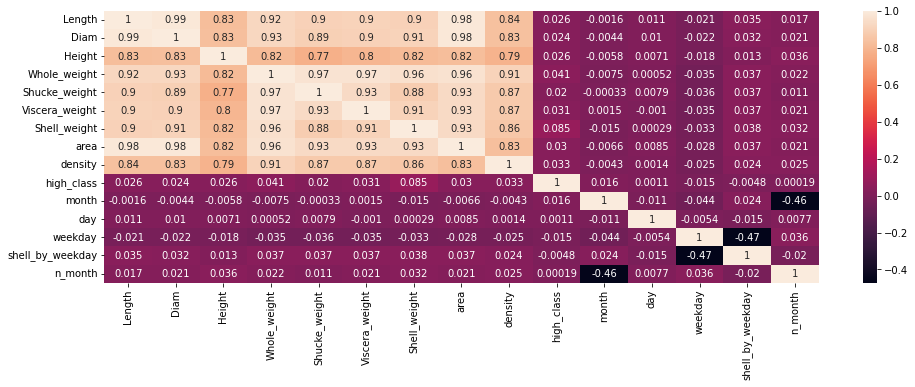

In [104]:
plt.figure(figsize = (16, 5))
ax = sns.heatmap(Xdf.dropna().corr(), annot=True)

Let's encode categorical features using dummie encoding

In [105]:
Xdf = pd.get_dummies(Xdf, columns=['FN', 'SN', 'LN'])

In [106]:
Xdf = pd.get_dummies(Xdf, columns=['Sex'])

In [107]:
# The last column is extra for encoding three features, so just drop it
Xdf = Xdf.drop(columns=df.columns[-1], axis=1) 

In [108]:
X = Xdf.values

In [109]:
Xdf

,Length,Diam,Height,Whole_weight,Shucke_weight,Viscera_weight,Shell_weight,area,density,high_class,month,day,weekday,shell_by_weekday,FN_Baby,...,SN_Flow,SN_Full,SN_Glam,SN_Glock,SN_Rock,LN_Death,LN_Head,LN_Killer,LN_Kitty,LN_Machine,LN_Man,LN_Master,Sex_F,Sex_I,Sex_M
0,0.450,0.350,0.130,0.5470,0.2450,0.1405,0.1405,0.15750,69.460317,False,6,21,6,0.2215,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.500,0.375,0.140,0.6040,0.2420,0.1415,0.1790,0.18750,64.426667,False,3,8,6,0.2215,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0.520,0.415,0.145,0.8045,0.3325,0.1725,0.2850,0.21580,74.559778,False,2,22,5,0.2180,1,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0.595,0.480,0.150,1.1100,0.4980,0.2280,0.3300,0.28560,77.731092,False,2,22,5,0.2180,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0.480,0.390,0.145,0.5825,0.2315,0.1210,0.2550,0.18720,62.232906,False,12,19,5,0.2180,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.640,0.510,0.175,1.3680,0.5150,0.2660,0.5700,0.32640,83.823529,False,5,12,1,0.2290,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5696,0.565,0.440,0.175,0.8735,0.4140,0.2100,0.2100,0.24860,70.273532,False,12,15,1,0.2290,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5697,0.385,0.290,0.090,0.2615,0.1110,0.0595,0.0745,0.11165,46.842812,False,12,6,6,0.2215,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5698,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,0.28500,77.894737,False,1,1,2,0.2280,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [110]:
# !pip install sklearn

In [111]:
# Q22 Split your data into train and test parts.
# How many records (rows) do you have in train and test tables? (list of int)?
# Use sklearn.model_selection.train_test_split with test_size=0.33 and random_state=7

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=True, random_state=7)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 44), (1380, 44), (2800,), (1380,))

In [113]:
# Fit predictive regression models.

# Q23.1 Use linear regression with l2 regularization (Ridge regression)
# Q23.2 Use decision tree regression
# Q23.3 Use k nearest neighbours regression

In [114]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error as mse


In [115]:
alpha = 1
depth = 5
ridge_reg = make_pipeline(StandardScaler(), Ridge())
tree_reg = DecisionTreeRegressor()


ridge_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train);

In [116]:
# Use grid search to select optimal hyperparamters of your models.

### Q24.1 Alpha for a ridge regression
### Q24.2 Depth for the tree
# Q24.3 Number of neighbours for the knn

In [117]:
def best_estimator(estimator, params, X, y, drow_plot=False, cv=KFold(n_splits=5), title_suffix=''):
    clf = GridSearchCV(estimator, params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, refit=True)
    clf.fit(X, y)
    if drow_plot:
        param = list(params.keys())[0]
        plt.figure(figsize=(12, 6))
        plt.title(f"{estimator}")
        plt.xlabel(f"{param}")
        plt.ylabel("mean test mse score")
        plt.scatter(params[param], clf.cv_results_['mean_test_score'], color="red", label="mean_test_score", )
        plt.grid(ls=":")
        plt.legend(loc="best")
        plt.show()
#     print(clf.cv_results_)
    print(f'Best params: {clf.best_params_}')
    print(f'Best score: {clf.best_score_}')
    return clf.best_estimator_, clf.best_params_

### Q24.1

In [118]:
ridge_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

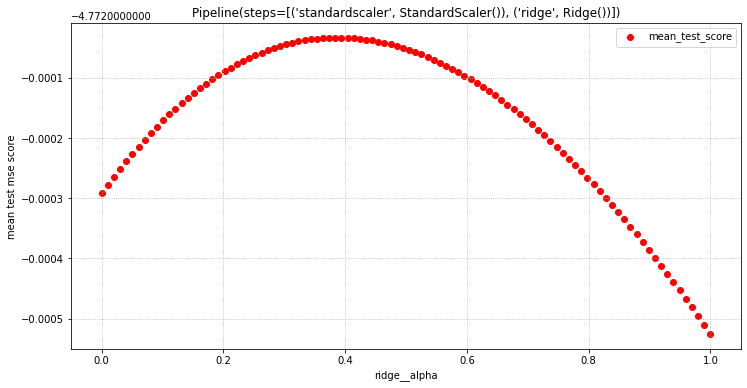

Best params: {'ridge__alpha': 0.38389999999999996}
Best score: -4.772032959672956


In [119]:
params = {
    'ridge__alpha': np.linspace(0.0001, 1, 100)
}
best_reg, best_params = best_estimator(ridge_reg, params, X, Y, drow_plot=True)

In [120]:
tree_reg.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

### Q24.2

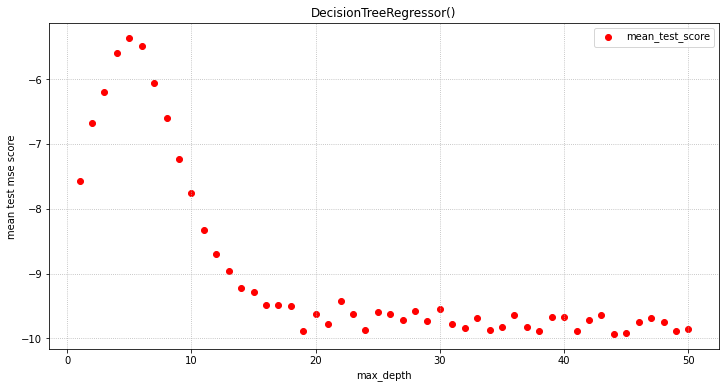

Best params: {'max_depth': 5.0}
Best score: -5.3591440266344765


In [121]:
params = {
    'max_depth': np.linspace(1, 50, 50)
}
best_tree, best_params = best_estimator(tree_reg, params, X, Y, drow_plot=True)

In [122]:
# Compute train and test mean squared error for your best models (list of float).

# Q25.1 Train, test MSE using linear regression with l2 regularization
# Q25.2 Train, test MSE using decision tree regression
# Q25.3 Train, test MSE using k nearest neighbours regression

from sklearn.metrics import mean_squared_error as mse

In [123]:
y_pred_reg_test = best_reg.predict(X_test)
y_pred_tree_test = best_tree.predict(X_test)

y_pred_reg_train = best_reg.predict(X_train)
y_pred_tree_train = best_tree.predict(X_train)

In [124]:
print('Ridge MSE test:', mse(y_pred_reg_test, y_test),
      '\nTree MSE test:', mse(y_pred_tree_test, y_test))

Ridge MSE test: 4.747609704565122 
Tree MSE test: 5.150779238891319


In [125]:
print('Ridge MSE train:', mse(y_pred_reg_train, y_train),
      '\nTree MSE train:', mse(y_pred_tree_train, y_train))

Ridge MSE train: 4.56992989253409 
Tree MSE train: 4.46609226996062


In [126]:
# Compute train and test R^2 for your best models (list of float).

# Q26.1 Train, test R^2 using linear regression with l2 regularization
# Q26.2 Train, test R^2 using decision tree regression
# Q26.3 Train, test R^2 using k nearest neighbours regression

from scipy.stats import pearsonr
from sklearn.metrics import r2_score

In [127]:
print('ridge pearson test:', pearsonr(y_pred_reg_test, y_test)[0])
print('tree pearson test:', pearsonr(y_pred_tree_test, y_test)[0])

print('ridge pearson train:', pearsonr(y_pred_reg_train, y_train)[0])
print('tree pearson train:', pearsonr(y_pred_tree_train, y_train)[0])

ridge pearson test: 0.7334066170898317
tree pearson test: 0.7067136271242886
ridge pearson train: 0.7500096419784341
tree pearson train: 0.7567385875810341


In [128]:
print('ridge R^2 test:', r2_score(y_pred_reg_test, y_test))
print('tree R^2 test:', r2_score(y_pred_tree_test, y_test))

print('ridge R^2 train:', r2_score(y_pred_reg_train, y_train))
print('tree R^2 train:', r2_score(y_pred_tree_train, y_train))

ridge R^2 test: 0.12851456202868283
tree R^2 test: 0.04569841067038505
ridge R^2 train: 0.2250717020905757
tree R^2 train: 0.23574392323718152


In [129]:
# Q27 Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).

In [130]:
n_top = 5
idx_sorted = np.argsort(np.abs(best_reg[1].coef_))[::-1][:n_top]

for w, f in zip(best_reg[1].coef_[idx_sorted], Xdf.columns[idx_sorted]):
    print(f, w)

Whole_weight 4.670719440131367
Shucke_weight -4.096812029401302
area -3.311188652847155
Diam 2.479779663700677
Shell_weight 1.564250675086867


# Make sure your .ipynb is linearly executable     
# Kernel -> Restart & Run All -> No ERROR cells